In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [26]:
bigN = [2, 5, 10, 20, 50, 100, 200]
deg = list(range(0,21))
#deg = [19]
sigmas = [0.01, 0.1, 1]
#sigmas = [1]
lambd = 0
numCombinations = len(bigN)*len(deg)*len(sigmas)
print(numCombinations)

441


In [24]:
def plot_report_graph(x, y_data, x_label):
    for entry in y_data:
        y, labl = entry
        plt.plot(x, y, label=labl)
    plt.xlabel(x_label)
    plt.legend(loc="upper left")
    plt.show()

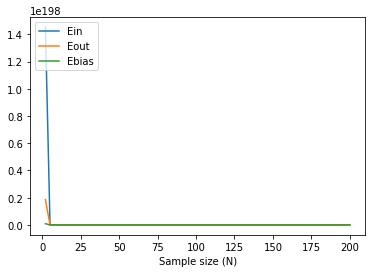

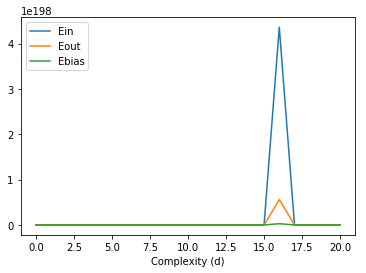

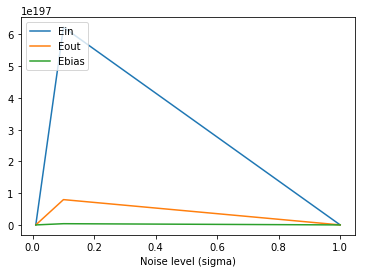

In [27]:
# do fun stuff with experiment
with open(".\experiments\experiments_8", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
    
n_dict, d_dict, sigma_dict = dict(), dict(), dict()
for exp in experiments:
    n, d, s = exp[0], exp[1], exp[2]
    
    n_dict[n] = n_dict.get(n, np.array([0, 0, 0])) + np.array(exp[3:6])
    d_dict[d] = d_dict.get(d, np.array([0, 0, 0])) + np.array(exp[3:6])
    sigma_dict[s] = sigma_dict.get(s, np.array([0, 0, 0])) + np.array(exp[3:6])

# avg (this actually isn't needed if I am normalizing from range 0 to 1)
n_dict = {k: x/(numCombinations/len(n_dict)) for k, x in n_dict.items()}
d_dict = {k: x/(numCombinations/len(d_dict)) for k, x in d_dict.items()}
sigma_dict = {k: x/(numCombinations/len(sigma_dict)) for k, x in sigma_dict.items()}

# pprint(n_dict)
# pprint(d_dict)
# pprint(sigma_dict)

# plot n vs Ein_avg, Eout_avg, Ebias
y_Ein = [n_dict[n][0] for n in bigN]
y_Eout = [n_dict[n][1] for n in bigN]
y_Ebias = [n_dict[n][2] for n in bigN]

plot_report_graph(bigN, [[y_Ein, "Ein"], [y_Eout, "Eout"], [y_Ebias, "Ebias"]], "Sample size (N)")

# plot deg vs Ein_avg, Eout_avg, Ebias
y_Ein = [d_dict[n][0] for n in deg]
y_Eout = [d_dict[n][1] for n in deg]
y_Ebias = [d_dict[n][2] for n in deg]

plot_report_graph(deg, [[y_Ein, "Ein"], [y_Eout, "Eout"], [y_Ebias, "Ebias"]], "Complexity (d)")

# plot sigma vs Ein_avg, Eout_avg, Ebias
y_Ein = [sigma_dict[n][0] for n in sigmas]
y_Eout = [sigma_dict[n][1] for n in sigmas]
y_Ebias = [sigma_dict[n][2] for n in sigmas]

plot_report_graph(sigmas, [[y_Ein, "Ein"], [y_Eout, "Eout"], [y_Ebias, "Ebias"]], "Noise level (sigma)")